#### Gradient descent as a first order approximation
- It moves in the direction of steepest loss reduction.
- It doesn’t tell you anything about curvature.
- We control our forward progress with a step size, $\alpha$
    - The step size is constraining the distance that you're going to update.
- The gradient is a vector (the gradient of loss with respect to each parameter in the model) and so when we multiply it by a scalar, we multiply the update along each parameter axis by the same fixed amount in terms of **Euclidean parameter distance**. 
- A single local estimate of gradient may only be valid in a small local region around that estimate. But, parameters can exist on different scales, and can have different degrees of impact on your learned conditional distribution, thus defining a safety bubble in terms of a fixed, global radius in Euclidean parameter space does not make much sense.

> Natural gradient is that instead of defining our safety window in terms of distance in parameter space, it uses **distance in distribution space**. So, instead of “I’ll follow my current gradient, subject to keeping the parameter vector within epsilon distance of the current vector,” you’d instead say “I’ll follow my current gradient, subject to keeping the distribution my model is predicting within epsilon distance of the distribution it was previously predicting”.

#### Distances in parameter space and distribution space
- We can see the problem when using only Euclidean metric in parameter space. Consider a Gaussian parameterized by only its mean and keep the variance fixed to 2 and 0.5. 

<img src=attachment:image.png width=300>
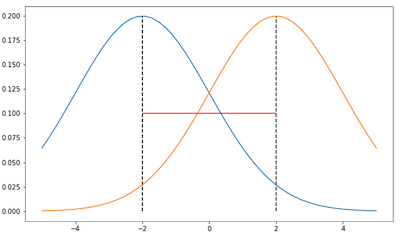

<img src=attachment:image.png width=300>
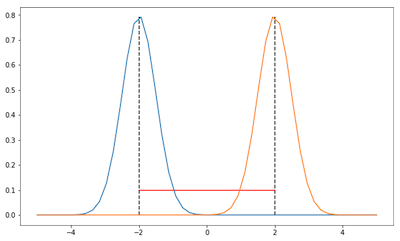

>In both images, the distance of those Gaussians are the same, i.e. 4, according to Euclidean metric (red line). However, clearly in distribution space, i.e. when we are taking into account the shape of the Gaussians, the distance is different in the first and second image. In the first image, the KL-divergence should be lower as there is more overlap between those Gaussians. Therefore, if we only work in parameter space, we cannot take into account this information about the distribution realized by the parameter.

#### Fisher Information

- **score**: the gradient of log likelihood function
$$l_\theta = \log L(\theta)$$
$$\dot{l}_{\theta} =\frac{\partial }{\partial \theta} \left[ ln L(\theta) \right ]$$
- When we try to estimate the parameter, $\theta$ of our model, the accuracy of the estimator is measure by the sharpness of the underlying PDF curve.
-  First, we note that the score function has mean zero under $P_\theta$,
<img src=attachment:image.png width=400>
- Note 
    - $P_{\theta_0}$로 generate된 dataset $X$에서 $\theta_{MLE} = \theta_0$이므로 gradient의 mean을 구하면 0이 나옴.
    - 그럼 $L(\theta)$의 curvature가 broad한지 sharp한지는?  The variance of the score is called Fisher Information.
    - Fisher Information: The expectation of second derivative of log likelihood function
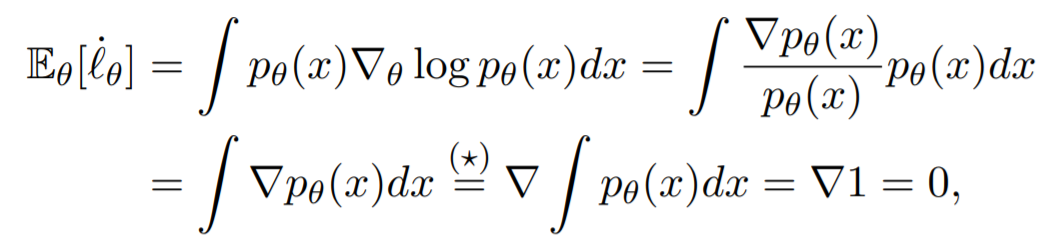

<img src=attachment:image.png width=400>
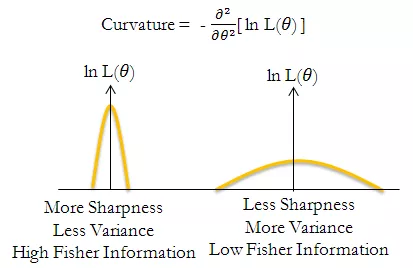

<img src=attachment:image.png width = 350>
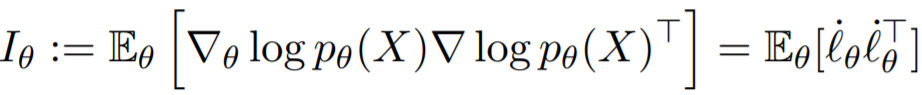

- Alternate definition of Fisher information as the negative
expected hessian of log-likelihood.
<img src=attachment:image.png width=650>
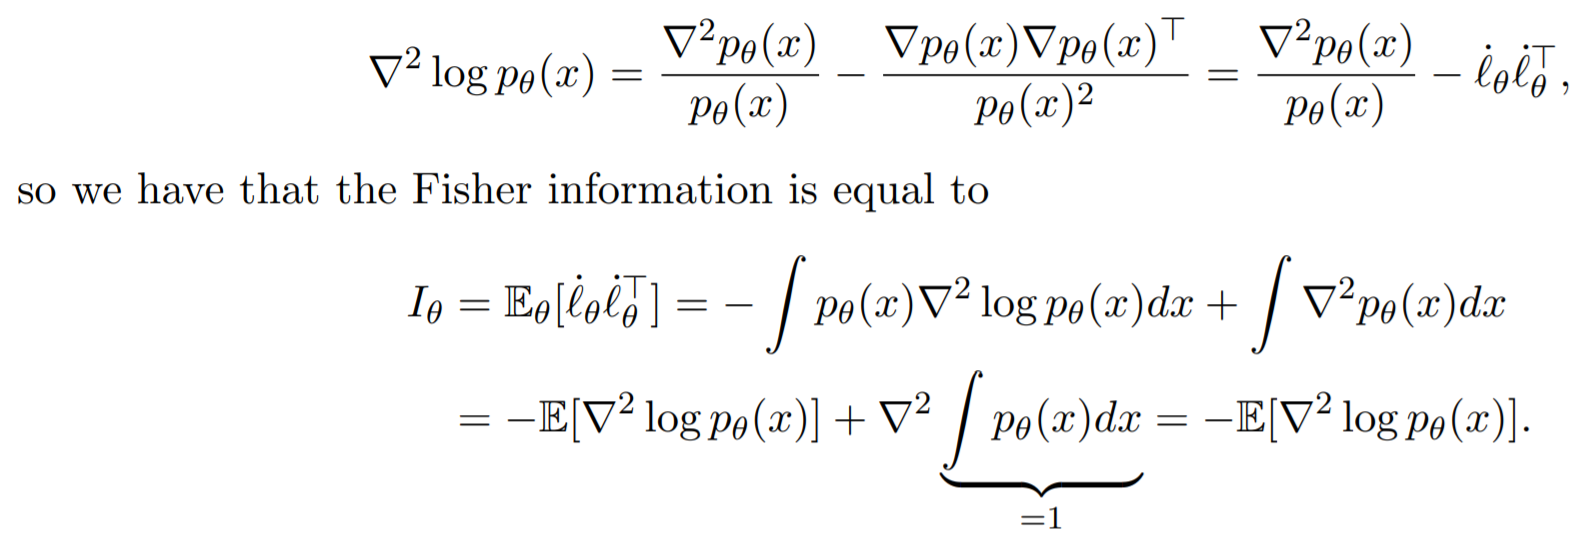

#### Natural Gradient
- Natural Gradient learning, a elegant idea that seeks to correct this arbitrariness of scaling in parameter space.
- In the context of Natural Gradient, KL divergence is deployed as a way of measuring the change in the output distribution our model is predicting.
> When we solve classification problem, then the output of our model will be a softmax, which can be seen as a multinomial distribution. When we talk about the conditional probability function defined by our current parameter values, this is the probability distribution we’re talking about. If we use a KL divergence as a way of scaling our gradient steps, that means that we see two parameter configurations as “farther apart” in this space if they would induce predicted class distributions that are very different, in terms of a KL divergence, for a given input image.

$$
\begin{align}
    \text{KL}[p(x \vert \theta) \, \Vert \, p(x \vert \theta + d)] &\approx \frac{1}{2} d^\text{T} \text{F} d \, .
\end{align}$$
$$d^* = \mathop{\text{arg min}}_{d \text{ s.t. } \text{KL}[p_\theta \Vert p_{\theta + d}] = c} \mathcal{L} (\theta + d)$$
- The purpose of fixing the KL-divergence to some constant is to make sure that we move along the space with constant speed, regardless the curvature. 
- In Lagrangian form,
$$ 
\begin{align}
d^* &= \mathop{\text{arg min}}_d \, \mathcal{L} (\theta + d) + \lambda \, (\text{KL}[p_\theta \Vert p_{\theta + d}] - c) \\
    &\approx \mathop{\text{arg min}}_d \, \mathcal{L}(\theta) + \nabla_\theta \mathcal{L}(\theta)^\text{T} d + \frac{1}{2} \lambda \, d^\text{T} \text{F} d - \lambda c \, .
\end{align}
$$
- take the derivative wrt. $d$
$$
\begin{align}
0 &= \frac{\partial}{\partial d} \mathcal{L}(\theta) + \nabla_\theta \mathcal{L}(\theta)^\text{T} d + \frac{1}{2} \lambda \, d^\text{T} \text{F} d - \lambda c \\[5pt]
    &= \nabla_\theta \mathcal{L}(\theta) + \lambda \, \text{F} d \\[5pt]
    \lambda \, \text{F} d &= -\nabla_\theta \mathcal{L}(\theta) \\[5pt]
    d &= -\frac{1}{\lambda} \text{F}^{-1} \nabla_\theta \mathcal{L}(\theta) \\[5pt]
\end{align}
$$

so the Natural gradient is defined as
$$\tilde{\nabla}_\theta \mathcal{L}(\theta) = \text{F}^{-1} \nabla_\theta \mathcal{L}(\theta) \, .$$

- Two main values of natural gradient:
    - It’s providing information about curvature
    - It’s providing a way to directly control movement of your model in predicted distribution space.

#### Practicality of Natural Gradient

- There is evidence of natural gradient leading to convergence happening in fewer steps, but practically speaking, it doesn’t provide compelling enough value to be in common use for most deep learning applications. 
- Because Natural Gradient is shown to speed up convergence in terms of gradient steps. That precision comes from the fact that each individual step of Natural Gradient takes longer, because it requires calculating a Fisher Information Matrix, which, remember, is a quantity that exists in n_parameters² space.

#### Curvature

>  Curvature is a useful thing to know because in an area of high curvature, where gradients are changing dramatically from point to point, you may want to be cautious taking a large step, your local signal of climbing a steep mountain mislead you into jumping off the cliff. A way I like to think about this is that if you’re in a region where gradients from point to point are very variable (that is to say: high variance), then your minibatch estimate of the gradient is in some sense more **uncertain**. By contrast, if the gradients are barely changing at a given point, less caution is needed in taking your next step. Second order derivative information is useful because it lets you scale your steps according to **the level of curvature**.

> What Natural Gradient is actually, mechanically, doing, is dividing your parameter updates by the second derivative of a gradient. The more the gradient is changing with respect to a given parameter direction, the higher the value in the Fisher Information Matrix, and the lower the update step in that direction will be. The gradient in question here is the gradient of the empirical likelihood for **the points in your batches**.

#### Implementations

In [1]:
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [2]:
X0 = np.random.randn(100, 2) - 1
X1 = np.random.randn(100, 2) + 1

X = np.vstack([X0, X1])
t = np.vstack([np.zeros([100, 1]), np.ones([100, 1])])

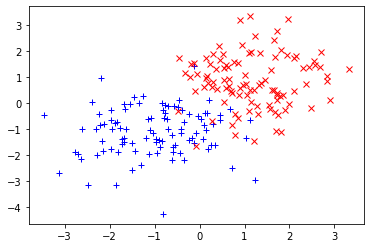

In [3]:
plt.figure()
plt.plot(X0[:,0],X0[:,1], 'b+')
plt.plot(X1[:,0],X1[:,1], 'rx')
plt.show()

In [4]:
X, t = shuffle(X, t)

X_train, X_test = X[:150], X[:50]
t_train, t_test = t[:150], t[:50]

m=150
alpha=0.1

$$ pred = \sigma(w_1 x_1 + w_2 x_2)$$

In [5]:
# Initialize weight, 
W = np.random.randn(2, 1) * 0.1

def sigmoid(x):
    return 1/(1+np.exp(-x))

def NLL(y, t):
    return -np.mean(t*np.log(y) + (1-t)*np.log(1-y))

In [6]:
# Forward
z = X_train @ W
y = sigmoid(z)
loss = NLL(y, t_train)

# Loss
print(f'Loss: {loss:.3f}')

Loss: 0.672


In [7]:
# differentiate negative log-likelihood with respect to y
dy = (y-t_train)/(m * (y - y*y))
# differentiate y with respect to sigmoid input (Wx)
dz = sigmoid(z)*(1-sigmoid(z))

dW = X_train.T @ (dz * dy)

In [8]:
W

array([[-0.01347138],
       [ 0.05770151]])

In [9]:
W = W - alpha * dW
print(W)

[[0.03988608]
 [0.10644022]]


In [10]:
grad_loglikelihood_z = (t_train-y)/(y - y*y) * dz
print(grad_loglikelihood_z.shape)
grad_loglikelihood_W = grad_loglikelihood_z * X_train
print(grad_loglikelihood_W.shape)

(150, 1)
(150, 2)


150개 example들이 $W_1$, $W_2$에 대해 각각 loss에 대한 gradient를 구한 것

In [11]:
F = np.cov(grad_loglikelihood_W.T)
print(F.shape)

(2, 2)


In [12]:
F

array([[0.23755549, 0.0138226 ],
       [0.0138226 , 0.20724842]])

In [13]:
np.linalg.inv(F)

array([[ 4.22594288, -0.28185266],
       [-0.28185266,  4.84392571]])

Fisher가 0.237로 크게 나왔다는 것은, 150개 point들의 W1에 대한 gradient가 variance가 컸다는 것. inverse F를 구해 그 방향으로 조금 움직이게 된다.

Vanilla Gradient Descent

In [14]:
# Model weight init
W = np.random.randn(2, 1) * 0.01

alpha = 0.1

# Training
for it in range(5):
    # Forward
    z = X_train @ W
    y = sigmoid(z)
    loss = NLL(y, t_train)

    # Loss
    print(f'Loss: {loss:.3f}')

    m = y.shape[0]

    dy = (y-t_train)/(m * (y - y*y))
    dz = sigmoid(z)*(1-sigmoid(z))
    dW = X_train.T @ (dz * dy)

    grad_loglik_z = (t_train-y)/(y - y*y) * dz
    grad_loglik_W = grad_loglik_z * X_train
    F = np.cov(grad_loglik_W.T)

    # Step
#     W = W - alpha * np.linalg.inv(F) @ dW
    W = W - alpha * dW

# print(W)

y = sigmoid(X_test @ W).ravel()
acc = np.mean((y >= 0.5) == t_test.ravel())

print(f'Accuracy: {acc:.3f}')

Loss: 0.695
Loss: 0.641
Loss: 0.596
Loss: 0.557
Loss: 0.524
Accuracy: 0.960


Natural Gradient Descent

In [15]:
# Model weight init
W = np.random.randn(2, 1) * 0.01

alpha = 0.1

# Training
for it in range(5):
    # Forward
    z = X_train @ W
    y = sigmoid(z)
    loss = NLL(y, t_train)

    # Loss
    print(f'Loss: {loss:.3f}')

    m = y.shape[0]

    dy = (y-t_train)/(m * (y - y*y))
    dz = sigmoid(z)*(1-sigmoid(z))
    dW = X_train.T @ (dz * dy)

    grad_loglik_z = (t_train-y)/(y - y*y) * dz
    grad_loglik_W = grad_loglik_z * X_train
    F = np.cov(grad_loglik_W.T)

    # Step
    W = W - alpha * np.linalg.inv(F) @ dW
#     W = W - alpha * dW

# print(W)

y = sigmoid(X_test @ W).ravel()
acc = np.mean((y >= 0.5) == t_test.ravel())

print(f'Accuracy: {acc:.3f}')

Loss: 0.679
Loss: 0.495
Loss: 0.289
Loss: 0.176
Loss: 0.160
Accuracy: 0.980


- Natural Gradient converges faster consistently. However,in deep learning models is very large, within millions of parameters. The Fisher Information Matrix for these kind of models is then infeasible to compute, store, or invert. This is the same problem as why second order optimization methods are not popular in deep learning.
- One way to get around this problem is to approximate the Fisher/Hessian instead. Method like ADAM computes the running average of first and second moment of the gradient. First moment can be seen as momentum which is not our interest in this article. The second moment is approximating the Fisher Information Matrix, but constrainting it to be diagonal matrix. Thus in ADAM, we only need $O(n)$ space to store (the approximation of) F instead of $O(n^2)$
 and the inversion can be done in $O(n)$
 instead of $O(n^3)$
. In practice ADAM works really well and is currently the de facto standard for optimizing deep neural networks.